# <font color=olivedrab> World Bank Global Poverty and Education Tutorial</font>
## <font color=palevioletred> Nandhini Krishnan </font>
***

## 1. Introduction

The World Bank provides access for public use to various databases in order to understand stages of development across countries. One database that they provide is various data points deemed as indicators for poverty. Some examples of these indicators are:
* Poverty Gap at $3.20 a day
* Gini Index
* Population Living in Slums
* Proportion of people living below 50 percent of median income

Indicators such as these allow for one to make concrete inferences about a country's development. From indicators such as the ones above, we can analyze how much progress overtime contries have made in reducing poverty within the nation and improving the livlihood of the people. Poverty has long standing effects into other sectors of society. For example, there are close correlations between poverty and hunger, education, and the economy. The World Bank provide data for all of these factors. For the purpose of this tutorial, we will be focusing on the datasets provided for poverty and education. 

Education is important for countries in order to continue to strive towards innovation and improve development. It is also the key to help people out of poverty as education allows for people to obtain jobs that provide a sustainable income to support themselves and their family. Looking at indicators of Education allow for us to get an understanding of educational improvements a country is making. Example of Education indicators are:
* Literacy Rates
* Education Attainment
* Unemployment Rate
* Compulsory education, duration (years)

Looking at both education and poverty can be a means of understanding country economic development and areas for improvement. Education and poverty are closely linked according to [a study by UNESCO](https://en.unesco.org/news/world-poverty-could-be-cut-half-if-all-adults-completed-secondary-education). As a result, education can be the key to help developing countries overcome obstacles of poverty and futher develop their economies.

As a result, this tutorial looks to step through how to query and analyze data pertaining to Poverty and Education as provided by the World Bank. Here is also a link to my github repository in which I created this tutortial: [Link to repository](https://github.com/nkrishnan19/nkrishnan19.github.io)

## 2. Get the Data
First, we will begin by gathering the data for the [Poverty](https://data.worldbank.org/topic/poverty) and [Education](https://data.worldbank.org/topic/4) data frames. This requires dowloading the necessary CSV files from the [World Bank website](https://www.worldbank.org/en/home). 

The World Bank provides numerous amounts of data and insight into a country's economic and societal development. As a result, we can use the data provided to quantify information such as understanding poverty trends in countries due to education.

First we must extract the necessary information we need in order to draw analytical conclusions. To do this, we first create a dataframe for both the data with regards to poverty and a seperate one for education. Dataframes are useful data structures in data analysis that allow for the user to be able to filter data, plot and visualize, as well as compare different datasets. 

We got the data from the World Bank CSV files. Therefore, in order to read the csv files into a dataframe, we can use the `read_csv()` function. This is because it will allow us to utilize the structure of csv files to seperate each individual piece of data into its own element that can be queried and filtered as needed to visualize and make sense of the data. Thus, once using the `read_csv()` function we can then filter through the dataframes to extract only the poverty and education indicators discussed above that we wanted to analyze. This begins the process of cleaning data. Cleaning data is a necessary step in order to allow you to focus on the relevant and important information as well as address how to handle any missing or potentially inaccurate data.

We want to clean the data to ensure we was able to make meanigful inferneces. We can notice that many of the earlier years contained lots of missing information. As a result, let's choose to focus on the most recent 5 years worth of data provided: 2015 - 2020. In order to do this, let's create a new fileted dataframe for both the poverty and education data with only the years and indicators we want to analyze. After filtering to the necessary indicators and the years we want to focus on, we can also drop any countries in which all 6 years had missing data. This way we can focus only on relevant data to draw trends. 

Once all these steps were completed, we have cleaned and created 2 dataframes: one focusing on poverty indicators and one on education indicators. The way one cleans data is subjective to the purpose of the visualization and analysis. However, it is generally good data science practive to address missing data in the cleaning process

In [1]:
import pandas as pd # Pandas Library used to Crate Dataframes
import numpy as np # Numpy Library used for arrays and other math operations
import matplotlib.pyplot as plt # Matplotlib Library used for plotting
import plotly.express as px # Plotly library used to create interactive plots

plt.style.use('ggplot') # Style set for plots to create better visualizations

We created a dataframe that contains all the raw data from the csv files obtained from the World Bank. In order to create these dataframes, we employ the panda library which provides a series of functions that allow you to create and query dataframes. 

In [2]:
# Create Dataframe of Poverty Data from World Bank CSV
poverty_df = pd.read_csv("data/Poverty/Poverty_Data.csv", sep=',', header=2) 
poverty_df.columns = [c.replace(' ', '_') for c in poverty_df.columns]

In [3]:
# View first 5 rows of Poverty Data Frame
poverty_df.head()

Country_Name Country_Code  \
0        Aruba          ABW   
1        Aruba          ABW   
2        Aruba          ABW   
3        Aruba          ABW   
4        Aruba          ABW   

                                      Indicator_Name  Indicator_Code  1960  \
0  Annualized average growth rate in per capita r...  SI.SPR.PCAP.ZG   NaN   
1  Survey mean consumption or income per capita, ...     SI.SPR.PCAP   NaN   
2  Annualized average growth rate in per capita r...  SI.SPR.PC40.ZG   NaN   
3  Survey mean consumption or income per capita, ...     SI.SPR.PC40   NaN   
4          Poverty gap at $5.50 a day (2011 PPP) (%)  SI.POV.UMIC.GP   NaN   

   1961  1962  1963  1964  1965  ...  2012  2013  2014  2015  2016  2017  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2018  2019  2020  Unnamed:_65  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN          NaN  

[5 rows x 66 columns]

Next, we clean the dataframe to only include the years and indicators that we want to analyze. This allows us to hanlde the missing data from the csv file and focus our analysis.

In [4]:
# Set the Indicators We want for our Poverty Dataframe
poverty_indicators = ["Multidimensional poverty headcount ratio (% of total population)","Poverty gap at $3.20 a day (2011 PPP) (%)","Population living in slums (% of urban population)","Proportion of people living below 50 percent of median income (%)"]
boolean_series = poverty_df.Indicator_Name.isin(poverty_indicators)

# Clean the dataframe to only have desired indicators and years and drop countries with all data missing
filtered_df = poverty_df[boolean_series].reset_index()
filtered_df = filtered_df[['Country_Name','Indicator_Name','2015','2016','2017','2018','2019','2020']]
filtered_df = filtered_df.dropna(subset=['2015', '2016','2017','2018','2019','2020'], how='all').reset_index()
filtered_df.head()

index                 Country_Name  \
0      7  Africa Eastern and Southern   
1      8                  Afghanistan   
2     11                  Afghanistan   
3     15   Africa Western and Central   
4     16                       Angola   

                                      Indicator_Name  2015       2016  2017  \
0  Population living in slums (% of urban populat...   NaN  57.196225   NaN   
1  Multidimensional poverty headcount ratio (% of...   NaN  51.700000   NaN   
2  Population living in slums (% of urban populat...   NaN  71.300003   NaN   
3  Population living in slums (% of urban populat...   NaN  51.434008   NaN   
4  Multidimensional poverty headcount ratio (% of...  54.0        NaN   NaN   

        2018  2019  2020  
0  55.770973   NaN   NaN  
1        NaN   NaN  49.4  
2  70.699997   NaN   NaN  
3  51.168132   NaN   NaN  
4        NaN   NaN   NaN

We can repeat the same process using the pandas library on the education csv file in order to create the education dataframe and clean the data to focus on the indicators and years we want to analyze.

In [5]:
# Create Education Data Frame from World Bank Education Indicators
edu_df = pd.read_csv("data/Education/Education_Data.csv", sep=',', header=2) 
edu_df.columns = [c.replace(' ', '_') for c in edu_df.columns]

In [6]:
# View first 5 Rows of Education data frame
edu_df.head()

Country_Name Country_Code  \
0        Aruba          ABW   
1        Aruba          ABW   
2        Aruba          ABW   
3        Aruba          ABW   
4        Aruba          ABW   

                                      Indicator_Name     Indicator_Code  \
0      Population ages 15-64 (% of total population)  SP.POP.1564.TO.ZS   
1       Population ages 0-14 (% of total population)  SP.POP.0014.TO.ZS   
2  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
3  Unemployment, male (% of male labor force) (mo...  SL.UEM.TOTL.MA.ZS   
4  Unemployment, female (% of female labor force)...  SL.UEM.TOTL.FE.ZS   

        1960       1961       1962       1963       1964       1965  ...  \
0  53.669919  54.056784  54.383281  54.710292  55.119933  55.631102  ...   
1  43.847190  43.358346  42.925745  42.488756  41.950133  41.290098  ...   
2        NaN        NaN        NaN        NaN        NaN        NaN  ...   
3        NaN        NaN        NaN        NaN        NaN        NaN  ...   
4        NaN        NaN        NaN        NaN        NaN        NaN  ...   

        2012       2013       2014       2015       2016       2017  \
0  68.986934  69.108851  69.181105  69.159774  69.137615  68.946339   
1  20.092629  19.593055  19.111724  18.703098  18.257495  17.980183   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

        2018       2019       2020  Unnamed:_65  
0  68.646606  68.321199  68.012289          NaN  
1  17.802447  17.620445  17.381938          NaN  
2        NaN        NaN        NaN          NaN  
3        NaN        NaN        NaN          NaN  
4        NaN        NaN        NaN          NaN  

[5 rows x 66 columns]

In [7]:
# Set the education indicators we wish to use
edu_indicators = ["Literacy rate, adult total (% of people ages 15 and above)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Compulsory education, duration (years)"]
boolean_series = edu_df.Indicator_Name.isin(edu_indicators)

# Clean and filter the education dataframe to only have the indicators and years we want and drop countries with all data missing
edu_filter_df = edu_df[boolean_series].reset_index()
edu_filter_df = edu_filter_df[['Country_Name','Indicator_Name','2015','2016','2017','2018','2019','2020']]
edu_filter_df = edu_filter_df.dropna(subset=['2015', '2016','2017','2018','2019','2020'], how='all').reset_index()

## 3. Visualizations
Once the dataframes have been created and cleaned, we can now begin the visualization process in which we can then draw analysis and conclusions from the World Bank CSV files. For this tutorial, I chose to look at trends globally as well as within differnt types of countries. Furthermore, I wished to look for correlating factors between education and poverty indicators. As a result, we can focus on each of the indicators seperately, and then analyzed them jointly with a corresponding indicator from the other data frame.

Let's first look at literacy rates on a global scale. This is because literacy can be an accurate indicator to the level of education and development within a country. Higher literacy rates imply more individuals are educated, and thus are able to obtain higher paying jobs and contribute to innovation solutions and strategies to develop a country. Furthermore, it speaks to how educated the country is as a whole as literacy is considered a basic level of education requirement. The World Bank provides an indicator that shows the percentage of a country's popualtion age 15 and above that are literate. 

Next, we can look at the Multidimensional poverty headcount ratio on an international scale. This is the percentage of a country's population who are deemed to be multi-dimensionally poor. Once looking at both these factors individually, we can plot them both to compare the factors to one another and draw beneficial conclusions. 


We first can use the pandas library to filter the education and the poverty data frames to only include data on the indicators we wish to focus on. This then allows for us to create subplots to look at each individual country's trend for the various education and poverty indicators. When creating subplots for each country that has literacy rates, we will focus on countries that provided at minimum 3 years worth of data. This is so that we could build a plot to visualize a general trend of the literacy rate from 2015 to 2020. We next can calculate the mean literacy rate globally for each of the years and plotted that as well. This was so that we could get an understanding of the internationally as a whole how the world was doing with regards to education and literacy rates. We can then repeat the same steps in order to visualize the mean multidimensional poverty ratio globally as well. This allows for us to provide multiple forms of visualizations to the same set of indicators in order to have a wholistic picture to make meanigful inferneces.

In order to create the subplots looking at literacy rates, we first must create a function that will allow for us to mark which countries have enough data to create a plot. The defined `count_plot()` function goes through each row of a given data frame and returns True if at least 3 of the years have data and false otherwise. In this, we employ python's library numpy which allows us to work with `nan` which is a numpy value used to indicate missing data. We thus want to continue to minimize the amount of missing data we work with in order to make meaninful inferences. Once marking each country as to whether or not it can be plotted, we can then filter the dataframe once more to only focus on the countries that can be plotted and create subplots of them. 

In [8]:
# Filter the Education Data Frame to create a dataframe that focuses only on Literacy Rates
edu_litearcy =  edu_filter_df[edu_filter_df['Indicator_Name']=="Literacy rate, adult total (% of people ages 15 and above)"]
edu_litearcy.head()

index          Country_Name  \
1       3                 Aruba   
12     23               Albania   
17     31            Arab World   
21     35  United Arab Emirates   
24     39             Argentina   

                                       Indicator_Name       2015       2016  \
1   Literacy rate, adult total (% of people ages 1...        NaN        NaN   
12  Literacy rate, adult total (% of people ages 1...        NaN        NaN   
17  Literacy rate, adult total (% of people ages 1...  73.499390  74.840797   
21  Literacy rate, adult total (% of people ages 1...        NaN        NaN   
24  Literacy rate, adult total (% of people ages 1...  99.179962  99.125008   

         2017       2018       2019       2020  
1         NaN  97.807419        NaN        NaN  
12        NaN  98.141151        NaN        NaN  
17  75.766823  72.869087  73.114250  73.367767  
21        NaN        NaN  97.556923        NaN  
24        NaN  99.003868        NaN        NaN

In [9]:
# Create a dataframe filtering only multidimensional poverty from poverty dataframe
poverty_headcount =  filtered_df[filtered_df['Indicator_Name']=="Multidimensional poverty headcount ratio (% of total population)"]
poverty_headcount.head()

index Country_Name                                     Indicator_Name  \
1       8  Afghanistan  Multidimensional poverty headcount ratio (% of...   
4      16       Angola  Multidimensional poverty headcount ratio (% of...   
16     40      Armenia  Multidimensional poverty headcount ratio (% of...   
20     56      Austria  Multidimensional poverty headcount ratio (% of...   
24     68      Belgium  Multidimensional poverty headcount ratio (% of...   

    2015  2016  2017  2018  2019  2020  
1    NaN  51.7   NaN   NaN   NaN  49.4  
4   54.0   NaN   NaN   NaN   NaN   NaN  
16  29.1  27.8  26.0  23.6   NaN   NaN  
20  18.3  18.0  18.1  17.5  16.9   NaN  
24  21.1  20.9  20.6  20.0  19.5   NaN

In [11]:
#Function to check which countries have at minimum 3 years worth of data to plot
# County how many data elements each country has and return true if there are at least 3 elements and false othewise

def count_plot(x):
 
    count = 0
    if not np.isnan(x['2015']):
        count = count + 1
    if not np.isnan(x['2016']):
        count = count + 1
    if not np.isnan(x['2017']):
        count = count + 1
    if not np.isnan(x['2018']):
        count = count + 1
    if not np.isnan(x['2019']):
        count = count + 1
    if not np.isnan(x['2020']):
        count = count + 1
    if count > 2:
        return True
    else:
        return False
    
    
# Add a column indicating if the country should be plotted based on fucntion
edu_litearcy["plot?"] = edu_litearcy.apply(count_plot, axis = 1)

#Filter education literacy data frame to only have countries to plot.
edu_litearcy = edu_litearcy[edu_litearcy["plot?"] == True]

In [12]:
edu_litearcy.head()

index Country_Name                                     Indicator_Name  \
17     31   Arab World  Literacy rate, adult total (% of people ages 1...   
24     39    Argentina  Literacy rate, adult total (% of people ages 1...   
40     63   Azerbaijan  Literacy rate, adult total (% of people ages 1...   
57     83   Bangladesh  Literacy rate, adult total (% of people ages 1...   
83    119       Brazil  Literacy rate, adult total (% of people ages 1...   

         2015       2016       2017       2018       2019       2020  plot?  
17  73.499390  74.840797  75.766823  72.869087  73.114250  73.367767   True  
24  99.179962  99.125008        NaN  99.003868        NaN        NaN   True  
40  99.788063  99.790062  99.791229        NaN  99.795982        NaN   True  
57  65.137329  72.758720  72.892967  73.912201  74.684464  74.908897   True  
83  92.047897  92.808441  93.075821  93.227501        NaN        NaN   True

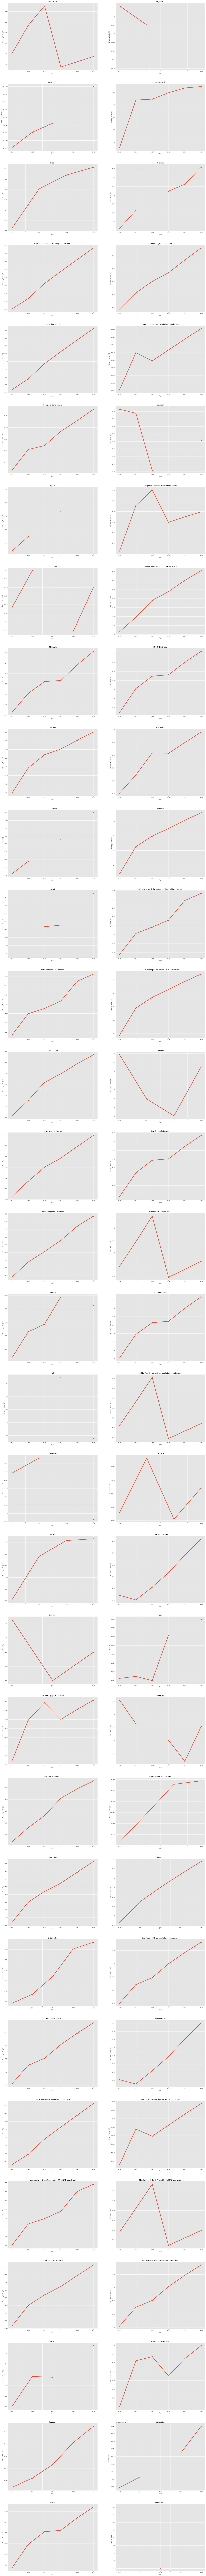

In [13]:
#Create subplots for each country of literacy rates over time
fig, axs = plt.subplots(32,2, figsize=(30,400))

#Loop through all countries and create individual line plots showing trend over time for literacy rates

for ax,(idx,row) in zip(axs.flat, edu_litearcy.iterrows()):
    row[['2015', '2016', '2017','2018','2019','2020']].plot(ax=ax, color=['C0','C1'], marker = 'o', linewidth = 4)
    ax.set_title(row['Country_Name'])
    ax.set_xlabel("Year")
    ax.set_ylabel("Litearcy Rate (%)")



In [14]:
# Create new dataframe reshaping the literacy rate dataframe for an interactive graph
data = []

# For each row of the education literacy rate dataframe, append to the new data array the literacy rate formatted Year, Rate, Country Name
for i,j in edu_litearcy.iterrows():
    temp = [2015, j['2015'], j.Country_Name]
    data.append(temp)
    temp = [2016, j['2016'], j.Country_Name]
    data.append(temp)
    temp = [2017, j['2017'], j.Country_Name]
    data.append(temp)
    temp = [2018, j['2018'], j.Country_Name]
    data.append(temp)
    temp = [2019, j['2019'], j.Country_Name]
    data.append(temp)
    temp = [2020, j['2020'], j.Country_Name]
    data.append(temp)
    
# Create new dataframe with reformatted litearcy rate 
my_lit = pd.DataFrame(data, columns = ['Year', 'Literacy Rate', 'Country'])   

# Create Interactive Plot
fig = px.line(my_lit, x="Year", y="Literacy Rate", color='Country')
fig.show()

Above is 2 different implementations to display the individual literacy rates among the different countries provided in the education dataframe. The first method is creating subplots for each individual country. This allows for an individual line graph for each country displaying the literacy rate trend. We are creating an individual plot for each row of our education dataframe. This can be a beneficial form of displaying individual country trends if we want to take a closer look at specific countries. 

The second implementation is the interactive graph seen directly above. Interactive graphs allow for the user viewing the visualizations to click and interact with the visualization in order to customize the view for their purposes. In our interactive graph, we are able to display all individual country literacy rates in one plot. This can be beneficial to view patterns such as which country has the highest rates, which have the lowest, or which had the greatest change over time. However, if we want to use the advantages of the subplots and look at a snapshot view of only one country, the interactive plot has the added benefit of showing this as well. We can double click on a country in the key and the graph will update to only display that country's trend and hide the rest. We can reset the view by double clicking that country again once more. In addition, single clicking on a country will hide that one country from the plot. Thus we can play around to display a combination of different countries to deduce meaninful inferences. Furthermore, the interactive graph allows you to zoom, scale, and easily downlod the graph. This can be beneficial when you are in the hypothesis phase of the data science life cycle. This is because you can start to explore different patterns of data to begin drawing a hypothesis for further analysis. 

To create the interactive graph, we need to first employ the python `plotly` library. This allows us to use functions to create the interactive plot. Next we need to reshape the dataframe in order to plot the literacy rates. This is because to use the interactive plot functions, we need a dataframe that has columns for the year, litearcy rate, and country name each seperately. Therefore, we must take our education literacy rate dataframe and reshape it to be a dataframe with these 3 columns. Then only can we call the interactive plot functions. We can repeat the same process for population in poverty headcount and create an interactive graph for all the countries as seen below.

In [15]:
# Create new dataframe reshaping the poverty headcount dataframe for an interactive graph
data = []

# For each row of the education poverty headcount dataframe, append to the new data array the literacy rate formatted Year, Rate, Country Name
for i,j in poverty_headcount.iterrows():
    temp = [2015, j['2015'], j.Country_Name]
    data.append(temp)
    temp = [2016, j['2016'], j.Country_Name]
    data.append(temp)
    temp = [2017, j['2017'], j.Country_Name]
    data.append(temp)
    temp = [2018, j['2018'], j.Country_Name]
    data.append(temp)
    temp = [2019, j['2019'], j.Country_Name]
    data.append(temp)
    temp = [2020, j['2020'], j.Country_Name]
    data.append(temp)

# Create new dataframe with reformatted poverty headcount rate 
my_lit = pd.DataFrame(data, columns = ['Year', 'Poverty Headcount', 'Country'])   

# Create Interactive Plot
fig = px.line(my_lit, x="Year", y="Poverty Headcount", color='Country')
fig.show()

A good way to analyze the subplot trends from above is to create a visualization of the mean literacy rates for on a global scale. This will allow for one to compare countries to the average trend and infer a wholistic understanding to the indicator being analyzed. To do this, we must calculate the mean for each year and create a new dataframe with this newly extracted information. We create the new dataframe with the year and mean of each year. We can then plot the dataframe in order to analyze the overall trend. We employ the python library matplotlib that allows us to utilize different plotting functionalities. For example, the library provides us with functions to use to create subplots as used above to plot each individual country. Furthermore, general plots can be made like the one we will create to look at the average literacy rate over time. 

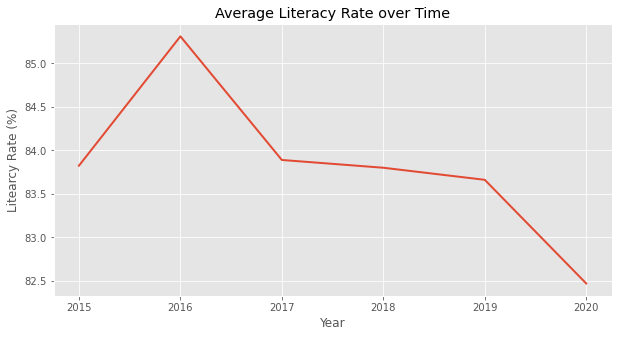

In [16]:
#Calculate average literacy rate each year
mean_2015 = edu_litearcy['2015'].mean()
mean_2016 = edu_litearcy['2016'].mean()
mean_2017 = edu_litearcy['2017'].mean()
mean_2018 = edu_litearcy['2018'].mean()
mean_2019 = edu_litearcy['2019'].mean()
mean_2020 = edu_litearcy['2020'].mean()

# initialize list of lists of year and average
data = [['2015', mean_2015 ], ['2016', mean_2016], ['2017', mean_2017],['2018', mean_2018], ['2019', mean_2019], ['2020', mean_2020]]
  
# Create the pandas DataFrame on the average literacy rate each year
avg_lit = pd.DataFrame(data, columns = ['Year', 'Literacy Rate'])

#Plot Average Literacy Rate over Time
fix, ax = plt.subplots(figsize = (10,5))
ax.plot(avg_lit['Year'], avg_lit['Literacy Rate'], linewidth = 2)
ax.set_title("Average Literacy Rate over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Litearcy Rate (%)")
plt.show()

The above figures is a plot of the average literacy rate each year globally as well as a break down for each country's literacy rate overtime. The average literacy rate over time increases form 2015 to a peak at 2016 of 82.65% and then steadily decreases until a sharper decline from 2019 to 2020. This is surprising as one would imagine overtime countries would be improving on education and literacy rates rather than the opposite. In order to draw any conclusion about why this is the case, I next compared the average trend of literacy rates to that of the headcount of multidimensional poverty.

Furthermore, the trend for each of the countries varies and does not have a constant pattern overall. Some countries view an increase overtime and some view a decrease. Furthermore, it is important to note the variabilty of the plots. Due to limiting factors in data collection, not all countries were able to provide data for all 5 years or consecuvtive years being analyzed. As a result, some plots are incomplete and do not have data for all the years while others have proper line graphs generating. We are unable to draw conclusions as to why this is the case and thus recognize that it can be a limiting factor in the analysis. 

We now want to repeat the filtering process above so that we can make meaningful inferences on the multidimensional poverty data from the World Bank CSV file. Thus, like earlier, we first want to create a new dataframe with only the Multidimensional Poverty Headcount Ratio. Then, we can once again repeat the process to calculate the average multidimensional poverty headcount ratio for each year, cretea a new dataframe with this information, and plot it to visualize the global trend.

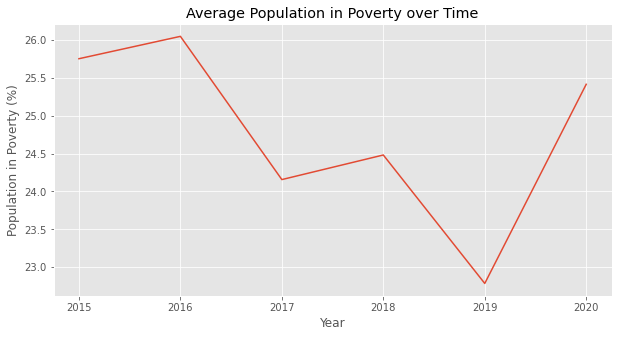

In [17]:
#Calculate average multidimensional poverty for each year
mean_2015 = poverty_headcount['2015'].mean()
mean_2016 = poverty_headcount['2016'].mean()
mean_2017 = poverty_headcount['2017'].mean()
mean_2018 = poverty_headcount['2018'].mean()
mean_2019 = poverty_headcount['2019'].mean()
mean_2020 = poverty_headcount['2020'].mean()

# initialize list of lists
data2 = [['2015', mean_2015 ], ['2016', mean_2016], ['2017', mean_2017],['2018', mean_2018], ['2019', mean_2019], ['2020', mean_2020]]

# Create the pandas DataFrame
avg_poverty = pd.DataFrame(data2, columns = ['Year', 'Population in Poverty Headcount'])

# Plot Average Population in Poverty Over Time
fix, ax = plt.subplots(figsize = (10,5))
ax.plot(avg_poverty['Year'], avg_poverty['Population in Poverty Headcount'])
ax.set_title("Average Population in Poverty over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Population in Poverty (%)")
plt.show()

Now that we have been able to successfully visualize two different indicators from both the poverty and education dataframes, we can now look to combine the two and deduce if a correlation exists between them. Python pandas provides us with a `merge()` function that merges two dataframes together. This function is best used when there is an overlapping column in which the data can be merged on. If one does not exist, look to `concat()` the dataframes instead. For our purposes, we know that the `Country_Name` column overlaps in both the literacy and multidimensional poverty dataframes and thus the `merge()` function makes sense to use. Furthermore, we want to do a inner join in our merge which means that we only want to keep the data of countries that exist in both dataframes and not if they only exist in one. 

In [18]:
# Create combined dataframe of literacy and multidimensional poverty factors
lit_headcount = edu_litearcy.merge(poverty_headcount, left_on='Country_Name', right_on='Country_Name')
lit_headcount.head()

index_x Country_Name                                   Indicator_Name_x  \
0      183     Colombia  Literacy rate, adult total (% of people ages 1...   
1      267      Ecuador  Literacy rate, adult total (% of people ages 1...   
2      283        Spain  Literacy rate, adult total (% of people ages 1...   
3      555    Sri Lanka  Literacy rate, adult total (% of people ages 1...   
4      619       Mexico  Literacy rate, adult total (% of people ages 1...   

      2015_x     2016_x     2017_x     2018_x     2019_x     2020_x  plot?  \
0  94.245049  94.653847        NaN  95.092506  95.249268  95.636330   True   
1  94.455658  94.350227  92.829788        NaN        NaN  93.626099   True   
2  98.143257  98.250511        NaN  98.436501        NaN  98.594460   True   
3        NaN  92.386902  91.895752  91.709824  92.252960        NaN   True   
4  94.472282  94.859619  94.972778  95.379913        NaN  95.247849   True   

   index_y                                   Indicator_Name_y  2015_y  2016_y  \
0      180  Multidimensional poverty headcount ratio (% of...   20.20   17.80   
1      264  Multidimensional poverty headcount ratio (% of...   34.95   35.10   
2      280  Multidimensional poverty headcount ratio (% of...   28.60   27.90   
3      552  Multidimensional poverty headcount ratio (% of...     NaN    2.37   
4      616  Multidimensional poverty headcount ratio (% of...     NaN   43.60   

   2017_y  2018_y  2019_y  2020_y  
0     NaN   19.60     NaN     NaN  
1   34.59   37.86   38.13     NaN  
2   26.60   26.10   25.30     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN   41.90     NaN     NaN

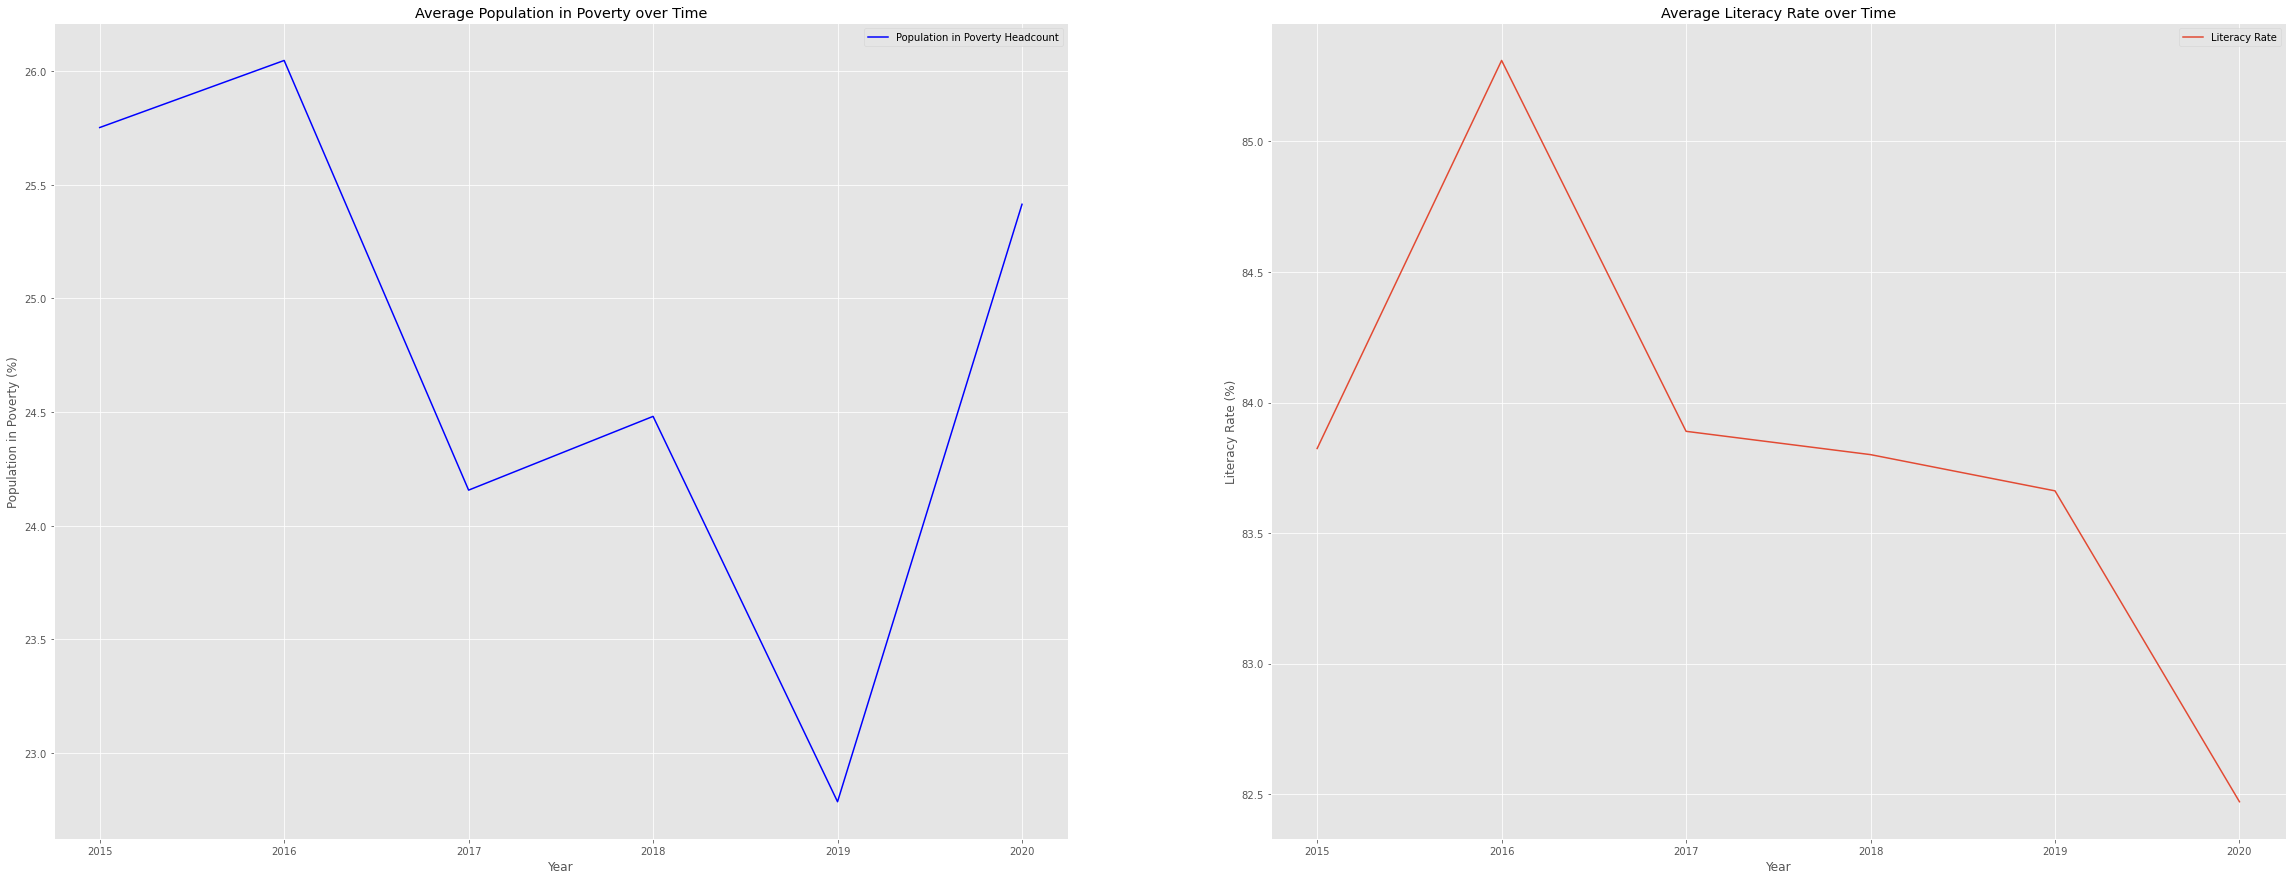

In [19]:
# Plot Average Population in Poverty and Literacy Rate Overtime Side by Side
fig, ax = plt.subplots(1,2, figsize=(40,15))
avg_poverty.plot(x = 'Year', y = 'Population in Poverty Headcount', ax = ax[0],color='blue')
avg_lit.plot(x = 'Year', y = 'Literacy Rate', ax = ax[1])
ax[0].set_title("Average Population in Poverty over Time")
ax[1].set_title("Average Literacy Rate over Time")
ax[0].set_ylabel("Population in Poverty (%)")
ax[1].set_ylabel("Literacy Rate (%)")
plt.show()

The above plots are visualizations of average multidimensional poverty overtime and a comparison to that of the average litearcy rates overtime. The general trend for the average percentage of population in multidimensional poverty is a decrease until 2019, where a sharp increase is observed. 2019 is when the multidimensional poverty ratio peaks at an all time low before rising in 2020 to 25.42%.

By placing the Average percentage of the population in multidimensional poverty side by side with the average literacy rate overtime, we can draw comparisons and conclusions based on the two indicators. For starters, we can observe that generally, while multidimensional poverty percentage is declinig, the literacy rate is increasing. Furthermore, when the sharp increase in multidimensional poverty is observed from 2019 to 2020, the sharp decrease in literacy rate is observed from 2019 to 2020. As a result, we can infer that there might exist some negative correlation between literacy and multidimensional poverty. This thus implies that a proper education can aid in combating poverty within countries.

In order to further visualize the comparison between multidimensional poverty and literacy, we can then took a closer look at a developing and developed country's specific trend in multidimensional poverty and literacy. In order to decide which countries to compare, we can filter through our merged dataframe as it is the intersection between the literacy rate and multidimensional dataframes. For our purposes, we will be analyzing El Salvador and Spain for the comparisons. This is because this will allow for us to anlayze a developed and developing country that has a sufficient amount of data to visualize.

In order to compare the two, we want to once again use the pandas library to create dataframes with the relevant information for each of the countries. In this case, we want to extract only El Salvador's and Spain's multidimensional poverty headcount and literacy rates. Once creating the dataframes for El Salvador's and Spain's indicators, we can then use matlibplot again to plot the country specific indicators in a comparison format similar to above. This will again allow us to determine if any meaningful inferences can be made.

In [20]:
# Fileter El Salvador Poverty Headcount 
el_sal1 = poverty_headcount[poverty_headcount['Country_Name'] == "El Salvador"]
# initialize list of lists
data1 = [['2015', el_sal1["2015"].unique()[0],"El Salvador" ], ['2016', el_sal1["2016"].unique()[0],"El Salvador"  ], ['2017', el_sal1["2017"].unique()[0],"El Salvador" ],['2018', el_sal1["2018"].unique()[0],"El Salvador" ], ['2019', el_sal1["2019"].unique()[0],"El Salvador" ], ['2020', el_sal1["2020"].unique()[0],"El Salvador" ]]

# Create the pandas DataFrame of El Salvador Population in Poverty Headcount
el_sal_pov = pd.DataFrame(data1, columns = ['Year', 'Population in Poverty Headcount', 'Country'])

# Filter El Salvador Literacy Rate
el_sal = edu_litearcy[edu_litearcy['Country_Name'] == "El Salvador"]
# initialize list of lists
data2 = [['2015', el_sal["2015"].unique()[0], "El Salvador" ], ['2016', el_sal["2016"].unique()[0],"El Salvador" ], ['2017', el_sal["2017"].unique()[0],"El Salvador"],['2018', el_sal["2018"].unique()[0],"El Salvador"], ['2019', el_sal["2019"].unique()[0],"El Salvador"], ['2020', el_sal["2020"].unique()[0],"El Salvador"]]

  
# Create the pandas DataFrame of El Salvador Literacy Rate
el_sal_lit = pd.DataFrame(data2, columns = ['Year', 'Literacy Rate', 'Country'])

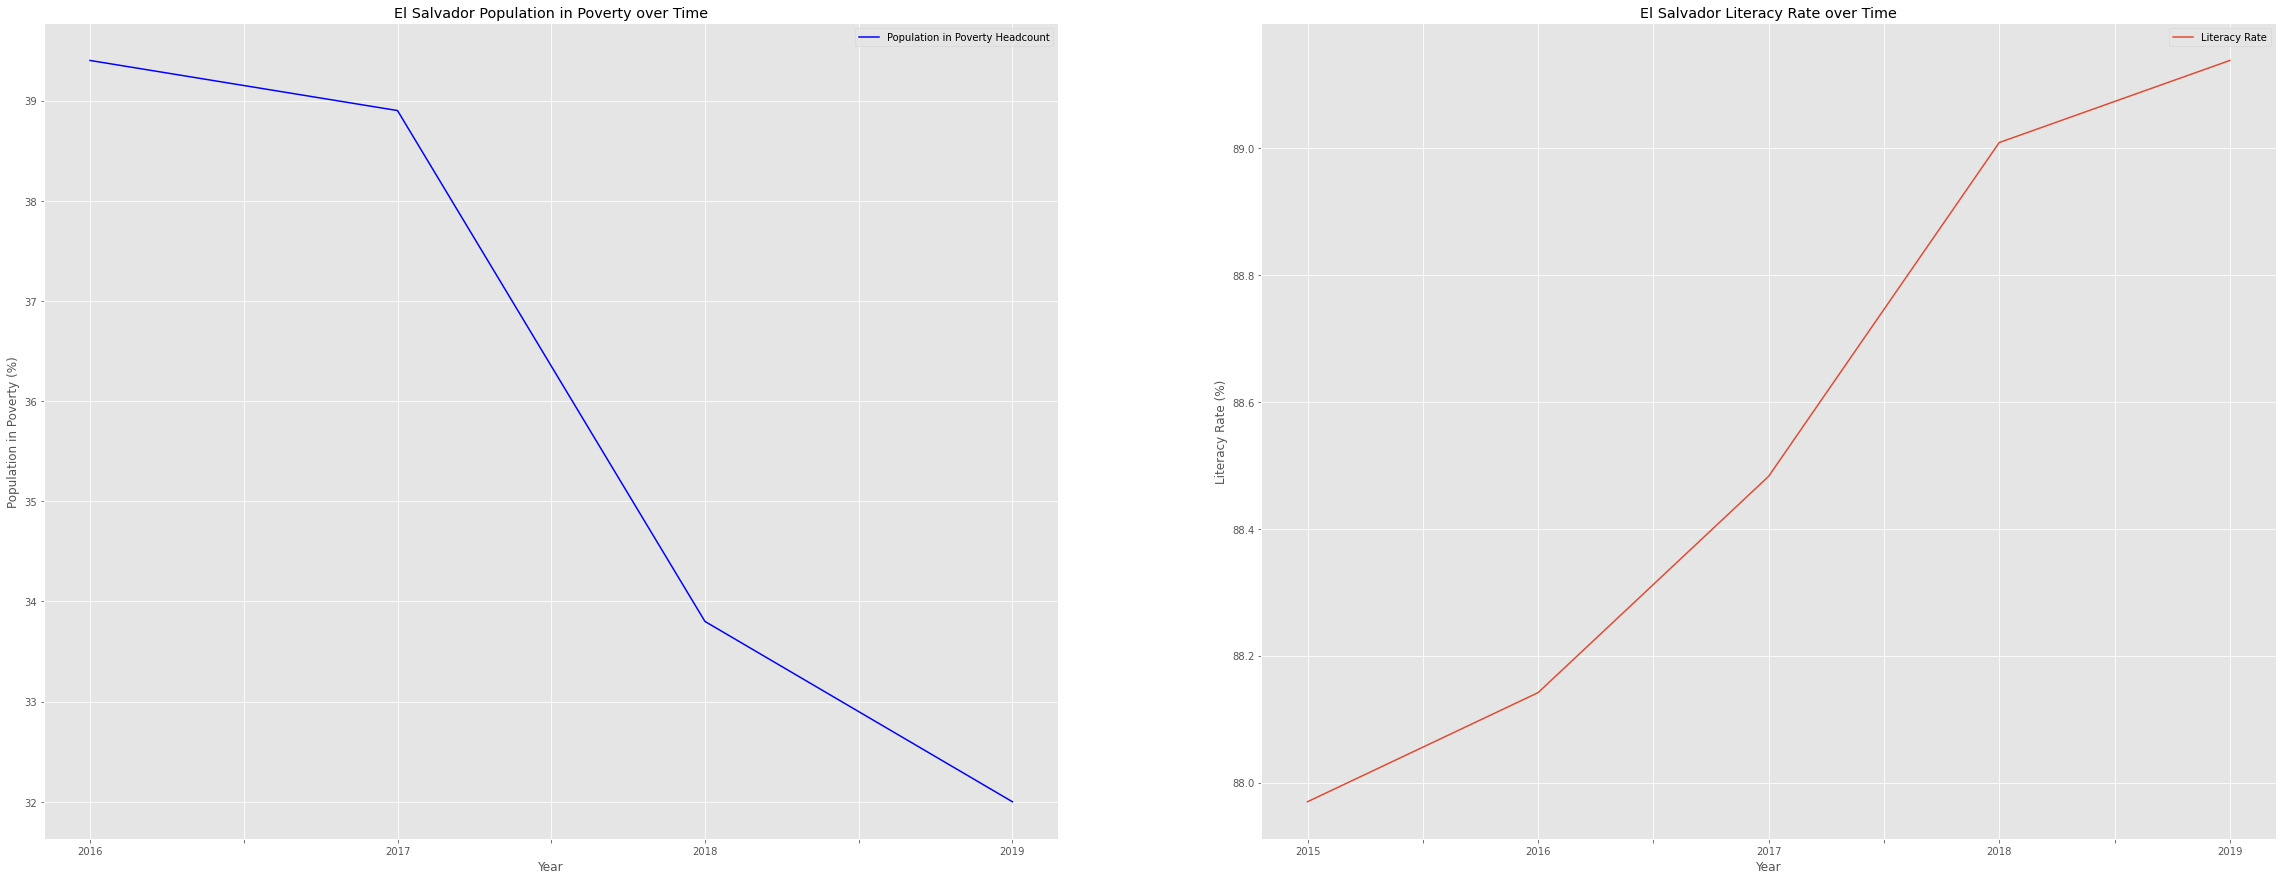

In [21]:
# Plot El Salvador Population in Poverty and Literacy Rate Overtime side by side
fig, ax = plt.subplots(1,2, figsize=(40,15))
el_sal_pov.plot(x = 'Year', y = 'Population in Poverty Headcount', ax = ax[0],color='blue')
el_sal_lit.plot(x = 'Year', y = 'Literacy Rate', ax = ax[1])
ax[0].set_title("El Salvador Population in Poverty over Time")
ax[1].set_title("El Salvador Literacy Rate over Time")
ax[0].set_ylabel("Population in Poverty (%)")
ax[1].set_ylabel("Literacy Rate (%)")
plt.show()

Like above in the comparison of average literacy rates and multidimensional poverty, we can compare the specific literacy rate and multidimensional poverty of El Salvador. Above depicts two plots of El Salvador. one plot shows the percentage of population in poverty overtime while the other shows the percentage of the adult population that is literate. The trend observed in El Salvador corroborate the internal average trend. This is because from 2016 to 2019 El Salvador observes a steady decline in the percentage of individuals in multidimensional poverty. During this same time span, El Salvador also expereinces a steady increase in the percenteage of adults that are literate. As a result this implies there does exist a negative correlation between the two ideas and further supports the idea that to reduce poverty one must increase education.

In [22]:
# Filter Spain Poverty Headcount
Spain1 = poverty_headcount[poverty_headcount['Country_Name'] == "Spain"]

# Filter Spain Literacy Rate
Spain2 = edu_litearcy[edu_litearcy['Country_Name'] == "Spain"]

# initialize list of lists
data1 = [['2015', Spain1["2015"].unique()[0], "Spain" ], ['2016', Spain1["2016"].unique()[0], "Spain" ], ['2017', Spain1["2017"].unique()[0],"Spain" ],['2018', Spain1["2018"].unique()[0],"Spain" ], ['2019', Spain1["2019"].unique()[0],"Spain" ], ['2020', Spain1["2020"].unique()[0],"Spain" ]]
  
# Create the pandas DataFrame of Spain Poverty Headcount
Spain_pov = pd.DataFrame(data1, columns = ['Year', 'Population in Poverty Headcount', 'Country'])


# initialize list of lists
data2 = [[2015, Spain2["2015"].unique()[0], "Spain" ], [2016, Spain2["2016"].unique()[0],"Spain"  ], [2017, Spain2["2017"].unique()[0],"Spain" ],[2018, Spain2["2018"].unique()[0],"Spain" ], [2019, Spain2["2019"].unique()[0],"Spain" ], [2020, Spain2["2020"].unique()[0],"Spain" ]]

  
# Create the pandas DataFrame Spain Literacy Rate
Spain_lit = pd.DataFrame(data2, columns = ['Year', 'Literacy Rate', 'Country'])

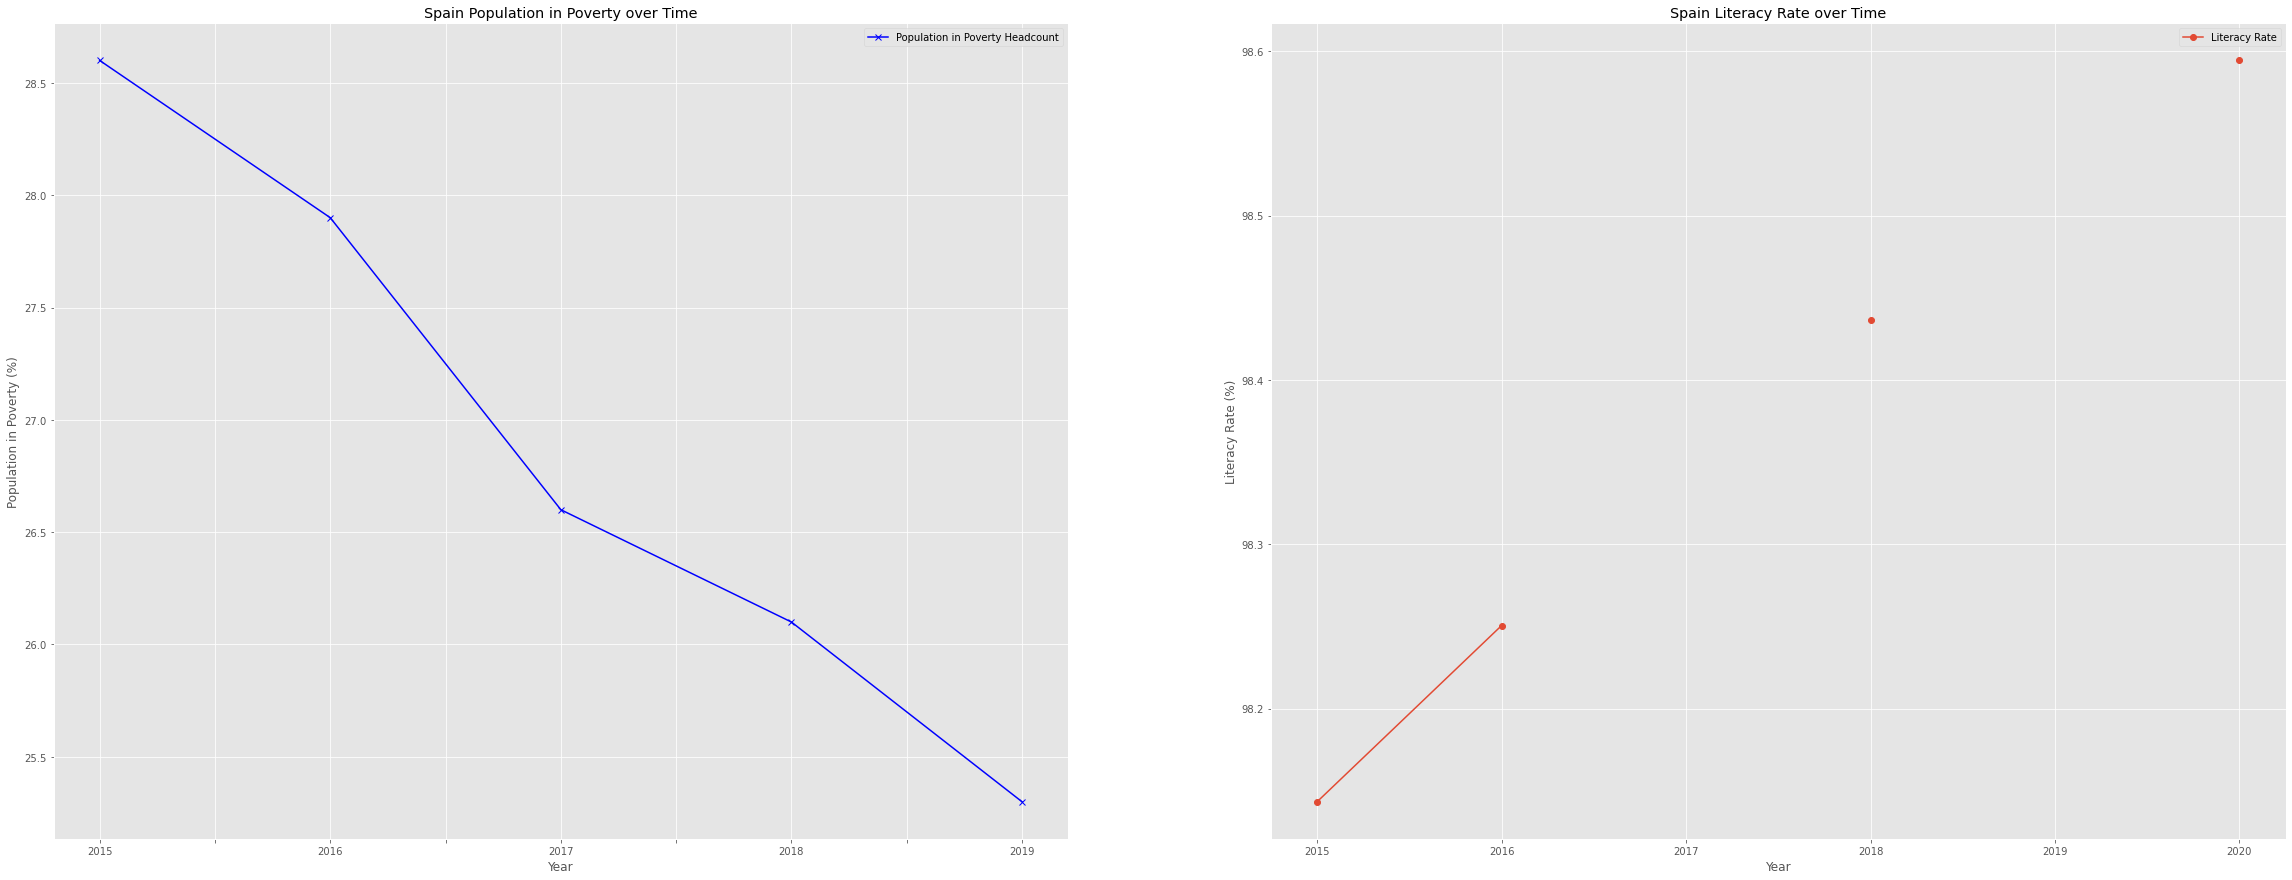

In [23]:
# Plot Spain Population in Poverty and Literacy Rate side by side
fig, ax = plt.subplots(1,2, figsize=(40,15))
Spain_pov.plot(x = 'Year', y = 'Population in Poverty Headcount',ax = ax[0],marker='x',color='blue')
Spain_lit.plot(x = 'Year', y = 'Literacy Rate',ax = ax[1],marker='o')
ax[0].set_title("Spain Population in Poverty over Time")
ax[1].set_title("Spain Literacy Rate over Time")
ax[0].set_ylabel("Population in Poverty (%)")
ax[1].set_ylabel("Literacy Rate (%)")
plt.show()

We can again employ similar strategieis to compare Spain's litearcy rate and multidimensional poverty. The above plot shows the general trends for Spain with regards to multidimensional poverty and literacy rates from 2015 to 2020. It is important to note that Spain does not have a complete set of data for literacy rate over the 5 year span being analyzed. It is missing data in 2017 and 2019. As a result, the line graph does not continue over the 6 years and abruptly ends with data points at 2018 and 2020. However, we can notice from the data we do have that there is a general trend for an increase in literacy rates over time. Furthermore, the change is minimal overtime as it goes from 98.2 in 2015 to 98.6 in 2020. Spain observes a decrease in the percentage of the population in multidimensional poverty over the 6 year span. This once again corroborates the trend seen in El Salvador and the average literacy rate and multidimensinal poverty rates. El Salvador is also a developing nation while Spain is considered more developed, yet both observe similar trends. Furthermore, the difference in status also explains why Spain observed a more minor change over time than El Salvador as it has less room for improvement than El Salvador.

We can see these ideas further by once again employing the `plotly` functions and creating interactive plots of Spain and El Salvador Literacy Rates and Multidimension Poverty Headcount. By ploting both countrys' literacy rates and poverty headcounts on one plot we can compare the trend and progress between the countries. As mentioned previously, Spain is more developed than El Salvador. This is corroborated by the fact that on the plots we can see that Spain has higher literacy rates than El Salvador and lower population in multidimensional poverty rates than El Salvador. Visualizing both countries in one plot allows for us to easily deduce these conclusions. Furthermore, the interactive graph allows the user to hover over data points of different years at see the exact literacy rate or population head count for that country at a given year. This flexibility can be beneficial when attempting to deduce meaninful inferences.

In [24]:
# Combine the Spanish and El Salvador Dataframes
df  = pd.concat([Spain_lit, el_sal_lit], ignore_index=True)

# Create Interactive Plot
fig = px.line(df, x="Year", y="Literacy Rate", color='Country')
fig.show()

In [25]:
# Combine Spanish and El Salvador Poverty in Headcount Dataframes
df  = pd.concat([Spain_pov, el_sal_pov], ignore_index=True)

# Create Interactive Plot
fig = px.line(df, x="Year", y="Population in Poverty Headcount", color='Country')
fig.show()


## 4. Conclusion

Data Science is a beneficial strategy to visualize and quantify large amounts of data in order to draw meaningful inferences. In our case, we were able to employ data science and analysis strategies to draw meaningful conclusions about education and poverty on an international scale. This is relevant as it can showcase to leaders that by improving upon and implementing policies to increase education, it could have a direct positive impact on the fight against poverty globally. 

This tutortial looks to go through different strategies to clean and filter dataframes in order to create beneficial visualizations for meaningful inferences. Due to the structure of the data used in the tutorial, the most meaningful type of plot that can be created for any of the data provided are line plots. This is because the education and poverty csv files all look to provide indicators over a span of time. Generally, when analzying trends overtime, line graphs are the best way to visualize the data. Thus, we walked through multiple ways to employ linegraphs to make different types of comparisons to draw conclusions. I encourage you to use repeat the steps of the tutortials with some of the other indicators discussed in order to practice data visualizations as well as to draw other types of conclusions between education and poverty. For example, one could explore the potential correlation between Poverty Gap at $3.20 a day and Education Attainment. This would mean looking at the average education level a person attains in a country and if that correlates to the number of people in the poverty gap. This is just one example among many other conclusions that can be analyzed from the given data.

The general process for data analysis involves first data collection and processing. In this tutorial, we skipped the data collection step, as the World Bank completed it for us by creating the csv files with the indicators we wanted to use. We processed the data by extracting it into dataframes that we then cleaned and tidy. Next comes the visualization and analysis step. In this is when we began to form plots of the data from the dataframes. Frome here we can begin to analyze the data and create hypothesis based on the trends we are seeing. This allows for us to then create and design machine learning models based on our hypothesis and data collected. These models can be used to predict future patterns which in turn can create insight used for policy modifications and other necessary decisions. In our case it could result in initiaitves to improve education in order to reduce poverty within countries. 

## 5. Resources
The best way to get an understanding of how to learn data science is to begin analyzing a trend interesting to you, and learn as you analyze the data. The libraries used in this tutorial: `matlabplot`, `pandas`, `plotly`, and `numpy` are some of the most common python libraries used data analysis. To learn more about the functionality of these libraries their documentation pages are linked below:

* [Matlabplot Documentation](https://matplotlib.org)
* [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html)
* [Numpy Documentation](https://numpy.org/devdocs/user/)
* [Plotly Documentation](https://plotly.com/python/)

Here is also a link to my github repository in which I created this tutortial: [Link to repository](https://github.com/nkrishnan19/nkrishnan19.github.io)

Data Science is a beneficial skillset that allows one to quantify and visualize large amounts of data. For this reason and the new access to big data, the field has continued to boom and data scientists continue to become higher in demand. If you are looking to explore data science further, here are some useful resources to expand your knowledge on the subject matter.

* [Data Science Life Cycle](https://www.geeksforgeeks.org/data-science-lifecycle/) - information going into further details on the data science life cycle and the specifics of each step within the process
* [Machine Learning vs Data Science](https://medium.com/geekculture/machine-learning-vs-data-science-what-are-they-132341ad3f66) - The difference between Machine Learning and Data science strategies as well as the intersection between the two
* [Data Visaulization](https://towardsdatascience.com/data-visualization-in-data-science-5681cbdde5bf) - Explanation about the Data Visualization process and how to create effective data visualizations and plots

Lastly, if you are looking to persue data science as a future career opportunity, here are some necessary resources and background materials useful when looking for job oppportunities in the field.

* [Data Commuication](https://towardsdatascience.com/humans-arent-natural-data-storytellers-but-you-can-be-fed221526356) - how to effectively communicate your data visualizations in order to tell a story and drive a point across
* [The Purpose of Data Scientists](https://medium.com/swlh/why-data-science-a-complete-beginners-guide-to-data-science-ea6910826f2b) - why data scientists and vital to driving necessary innovation and changes
* [Beginner Guide to Data Analysis](https://towardsdatascience.com/a-beginners-guide-to-data-analysis-in-python-188706df5447) - Background and guide as to how to create effective analysis based on the data given to work with

Data Science is a field that provides the opportunity to connect people who are familiar with a computer science background with those who are not in order to collaborate and create necessary policy changes and decisions to strive towards innovation. As a result, data scientists carry the necessary tools in order to begin conversations to back arguments for change needed driven with statistics and facts. Therefore we encourage you to follow the tutorial and try to compare some of the other indicators explained in the beginning. The process to quantify and analyse the indicators will be very simliar to the ones mapped in this tutorial.